In [2]:
from google.colab import drive
drive.mount("/content/drive/")
%cd '/content/drive/My Drive'
!pwd #Prints the present working directory

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive/
/content/drive/My Drive
/content/drive/My Drive


## Loading the Datasets:

In [3]:
stock_2000_pre = pd.read_csv("stock_2000_pre.csv")
stock_2004_pre = pd.read_csv("stock_2004_pre.csv")
stock_2008_pre = pd.read_csv("stock_2008_pre.csv")
stock_2012_pre = pd.read_csv("stock_2012_pre.csv")
stock_2016_pre = pd.read_csv("stock_2016_pre.csv")
stock_2020_pre = pd.read_csv("stock_2020_pre.csv")
stock_2024_pre = pd.read_csv("stock_2024_pre.csv")

In [4]:
stock_2000_post = pd.read_csv("stock_2000_post.csv")
stock_2004_post = pd.read_csv("stock_2004_post.csv")
stock_2008_post = pd.read_csv("stock_2008_post.csv")
stock_2012_post = pd.read_csv("stock_2012_post.csv")
stock_2016_post = pd.read_csv("stock_2016_post.csv")
stock_2020_post = pd.read_csv("stock_2020_post.csv")

## Creating dataframes of Pre-Election and Post-Election Data:

In [5]:
pre_dataframe = {
    'stock_2000_pre': stock_2000_pre,
    'stock_2004_pre': stock_2004_pre,
    'stock_2008_pre': stock_2008_pre,
    'stock_2012_pre': stock_2012_pre,
    'stock_2016_pre': stock_2016_pre,
    'stock_2020_pre': stock_2020_pre,
    'stock_2024_pre': stock_2024_pre
}

In [6]:
post_dataframe = {
    'stock_2000_post': stock_2000_post,
    'stock_2004_post': stock_2004_post,
    'stock_2008_post': stock_2008_post,
    'stock_2012_post': stock_2012_post,
    'stock_2016_post': stock_2016_post,
    'stock_2020_post': stock_2020_post
}

## Industry Mapping (Assigning appropriate industryto each stock)

In [7]:
industry_mapping = {
    "IBM": "Information Technology", "MSFT": "Information Technology", "INTC": "Information Technology",
    "ORCL": "Information Technology", "CSCO": "Information Technology", "AAPL": "Information Technology",
    "GOOGL": "Information Technology", "ADBE": "Information Technology", "NVDA": "Information Technology",
    "TSM": "Information Technology", "JNJ": "Health Care", "PFE": "Health Care", "MRK": "Health Care",
    "ABT": "Health Care", "LLY": "Health Care", "UNH": "Health Care", "ABBV": "Health Care",
    "JPM": "Financials", "BAC": "Financials", "C": "Financials", "WFC": "Financials", "AXP": "Financials",
    "GS": "Financials", "MS": "Financials", "F": "Consumer Discretionary", "NKE": "Consumer Discretionary",
    "HD": "Consumer Discretionary", "MCD": "Consumer Discretionary", "DIS": "Consumer Discretionary",
    "AMZN": "Consumer Discretionary", "LOW": "Consumer Discretionary", "T": "Communication Services",
    "VZ": "Communication Services", "BLS": "Communication Services", "CMCSA": "Communication Services",
    "EA": "Communication Services", "GOOG": "Communication Services", "META": "Communication Services",
    "TWX": "Communication Services", "PG": "Consumer Staples", "KO": "Consumer Staples",
    "PEP": "Consumer Staples", "MO": "Consumer Staples", "CL": "Consumer Staples", "WMT": "Consumer Staples",
    "COST": "Consumer Staples", "XOM": "Energy", "CVX": "Energy", "COP": "Energy", "HAL": "Energy",
    "SLB": "Energy", "PSX": "Energy", "GE": "Industrials", "BA": "Industrials", "MMM": "Industrials",
    "HON": "Industrials", "CAT": "Industrials", "RTX": "Industrials", "LMT": "Industrials", "UPS": "Industrials",
    "UNP": "Industrials", "PPG": "Materials", "DD": "Materials", "AA": "Materials", "IP": "Materials",
    "NEM": "Materials", "FCX": "Materials", "APD": "Materials", "LIN": "Materials", "SHW": "Materials",
    "SPG": "Real Estate", "PSA": "Real Estate", "EQR": "Real Estate", "VNO": "Real Estate", "BXP": "Real Estate",
    "PLD": "Real Estate", "AMT": "Real Estate", "EQIX": "Real Estate", "AVB": "Real Estate", "DUK": "Utilities",
    "SO": "Utilities", "EXC": "Utilities", "ED": "Utilities", "AEP": "Utilities", "NEE": "Utilities", "D": "Utilities"
}

In [8]:
# Loop through each DataFrame and create the Industry column
for name, df in pre_dataframe.items():
    df['Industry'] = df['Symbol'].map(industry_mapping)

# Loop through each DataFrame and create the Industry column
for name, df in post_dataframe.items():
    df['Industry'] = df['Symbol'].map(industry_mapping)

print(post_dataframe['stock_2000_post'].head())

                        Date       Open       High        Low      Close  \
0  2000-11-08 00:00:00+00:00  99.067879  99.187378  94.885277  95.602295   
1  2000-11-09 00:00:00+00:00  92.495216  95.602295  91.479446  95.064529   
2  2000-11-10 00:00:00+00:00  93.690247  94.048759  88.910133  88.910133   
3  2000-11-13 00:00:00+00:00  87.774857  95.064529  87.595604  93.152489   
4  2000-11-14 00:00:00+00:00  94.885277  95.482796  94.168259  95.124283   

   Adj Close   Volume Symbol                Industry  
0  51.411846  7312377    IBM  Information Technology  
1  51.122631  9464103    IBM  Information Technology  
2  47.813015  7121063    IBM  Information Technology  
3  50.094398  9084405    IBM  Information Technology  
4  51.154781  5387841    IBM  Information Technology  


## Calculating the Mean Closing Price of Stocks in each industry:

In [9]:
pre_industry_mean = {}
post_industry_mean = {}

# Function to calculate mean close price by industry for each DataFrame in a dictionary
def calculate_industry_mean(df_dict):
    industry_means = {}
    for name, df in df_dict.items():
        # Group by Industry and calculate the mean of the Close column
        industry_mean_close = df.groupby('Industry')['Close'].mean().reset_index()
        industry_means[name] = industry_mean_close
    return industry_means

# Calculate the mean closing prices for both pre and post-election data
pre_industry_mean = calculate_industry_mean(pre_dataframe)
post_industry_mean = calculate_industry_mean(post_dataframe)

In [10]:
# Save the Industry Mean Closing Price Sector wise
IMCP_2000_pre = pre_industry_mean['stock_2000_pre']

IMCP_2004_pre = pre_industry_mean['stock_2004_pre']

IMCP_2008_pre = pre_industry_mean['stock_2008_pre']

IMCP_2012_pre = pre_industry_mean['stock_2012_pre']

IMCP_2016_pre = pre_industry_mean['stock_2016_pre']

IMCP_2020_pre = pre_industry_mean['stock_2020_pre']

IMCP_2024_pre = pre_industry_mean['stock_2024_pre']

In [11]:
IMCP_2000_post = post_industry_mean['stock_2000_post']

IMCP_2004_post = post_industry_mean['stock_2004_post']

IMCP_2008_post = post_industry_mean['stock_2008_post']

IMCP_2012_post = post_industry_mean['stock_2012_post']

IMCP_2016_post = post_industry_mean['stock_2016_post']

IMCP_2020_post = post_industry_mean['stock_2020_post']

## Hypothesis 1: Election Trends in each industry - How does an election year affect the mean closing price for stocks in an industry ? In the broader sense, how does an industry get affected by an Election.



In [12]:
import matplotlib.pyplot as plt

# List of years and respective data
years = [2000, 2004, 2008, 2012, 2016, 2020, 2024]
pre_dataframes = [IMCP_2000_pre, IMCP_2004_pre, IMCP_2008_pre, IMCP_2012_pre, IMCP_2016_pre, IMCP_2020_pre, IMCP_2024_pre]
post_dataframes = [IMCP_2000_post, IMCP_2004_post, IMCP_2008_post, IMCP_2012_post, IMCP_2016_post, IMCP_2020_post]

# Extracting unique industries
industries = IMCP_2000_pre['Industry'].unique()

# Dictionary to store pre, post, and difference trends for each industry
industry_trends = {industry: {'pre': [], 'post': [], 'difference': []} for industry in industries}

# Populating trends
for i, year in enumerate(years):
    pre_df = pre_dataframes[i]
    post_df = post_dataframes[i] if i < len(post_dataframes) else None

    for industry in industries:
        # Get pre-election mean close price
        pre_mean = pre_df[pre_df['Industry'] == industry]['Close'].values[0]
        industry_trends[industry]['pre'].append(pre_mean)

        # Get post-election mean close price if available
        if post_df is not None and industry in post_df['Industry'].values:
            post_mean = post_df[post_df['Industry'] == industry]['Close'].values[0]
            industry_trends[industry]['post'].append(post_mean)
            # Calculate difference (post - pre)
            difference = post_mean - pre_mean
            industry_trends[industry]['difference'].append(difference)
        else:
            industry_trends[industry]['post'].append(None)
            industry_trends[industry]['difference'].append(None)

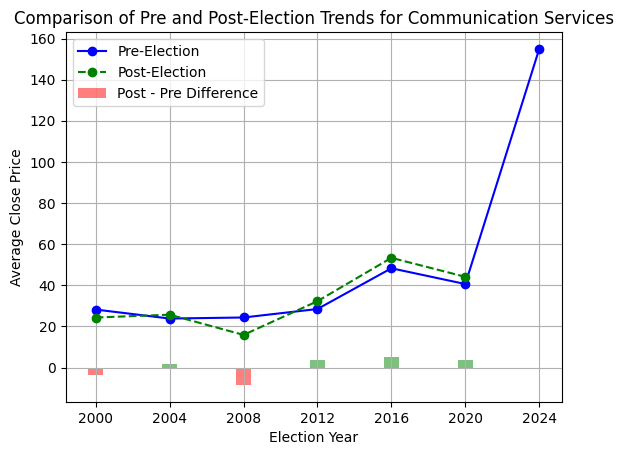

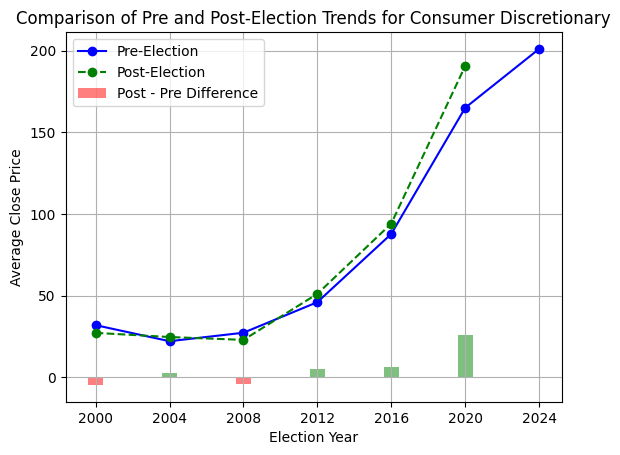

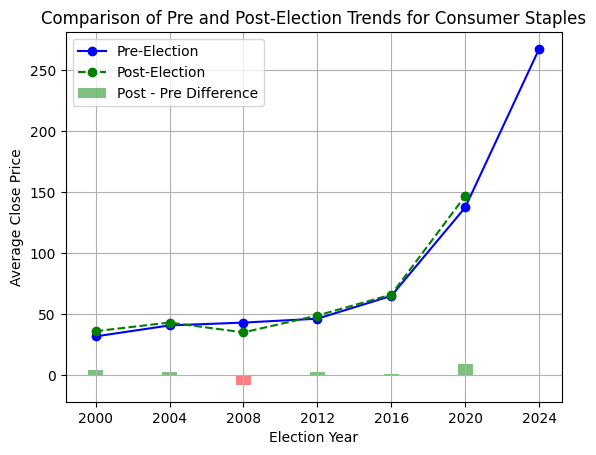

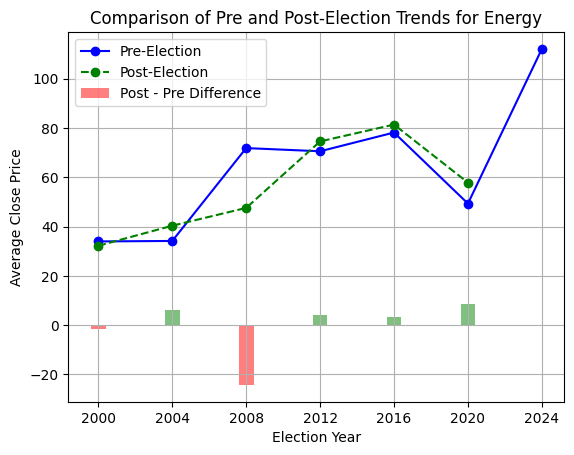

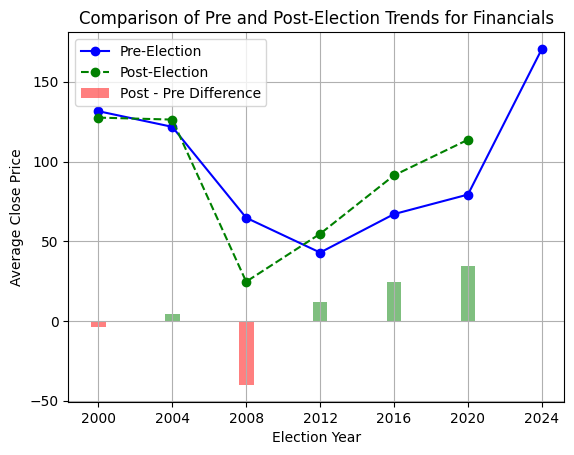

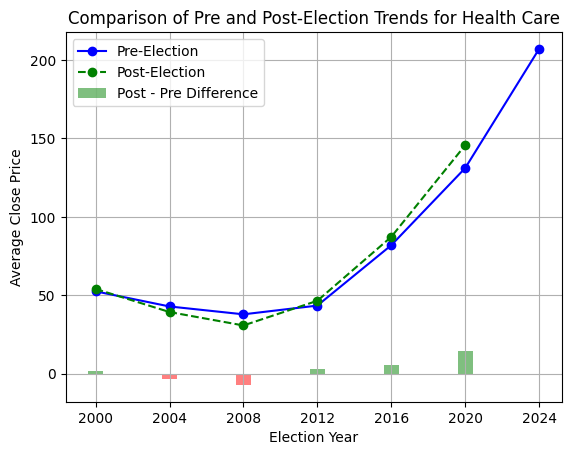

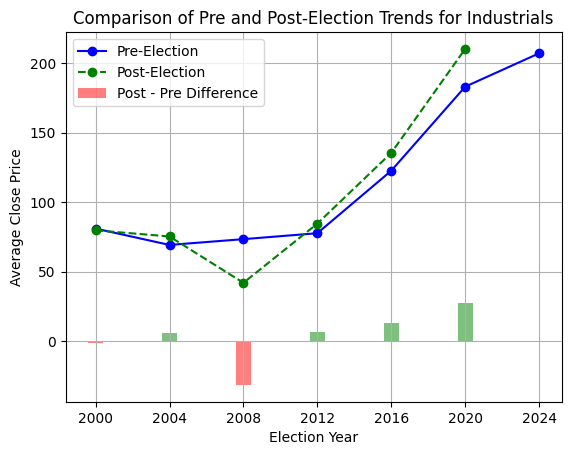

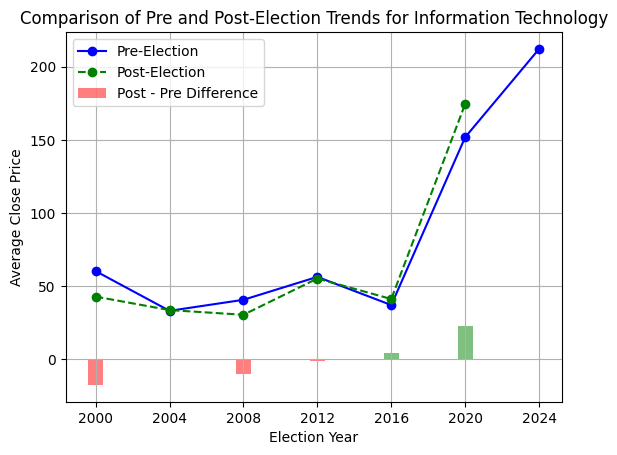

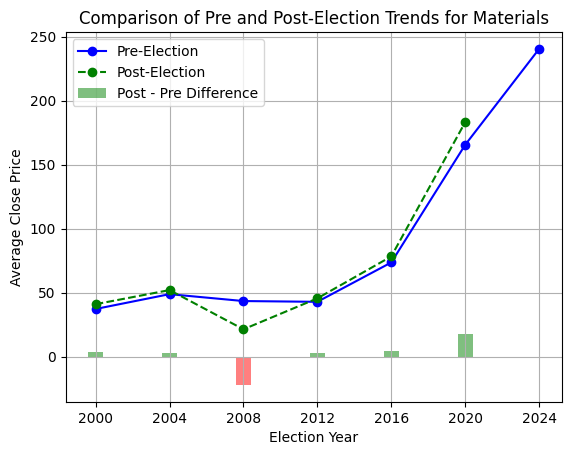

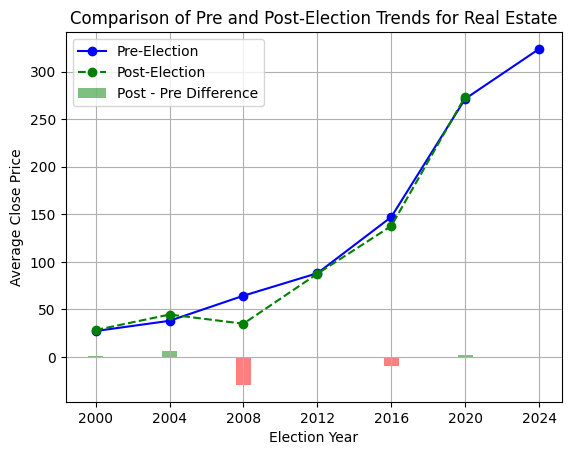

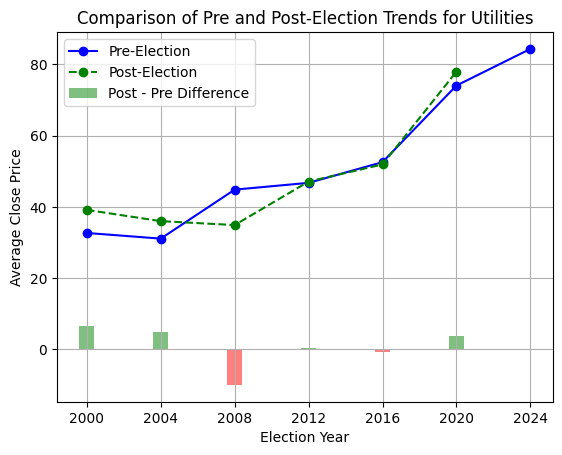

In [15]:
# Plotting trends for each industry
for industry, trends in industry_trends.items():

    # Plotting pre and post trends
    plt.plot(years, trends['pre'], marker='o', linestyle='-', color='blue', label='Pre-Election')
    plt.plot(years[:len(trends['post'])], trends['post'], marker='o', linestyle='--', color='green', label='Post-Election')

    # Adding bar plot with conditional color for the difference
    years_with_diff = [year for year, diff in zip(years, trends['difference']) if diff is not None]
    differences = [diff for diff in trends['difference'] if diff is not None]
    bar_colors = ['green' if diff > 0 else 'red' for diff in differences]
    plt.bar(years_with_diff, differences, color=bar_colors, alpha=0.5, label='Post - Pre Difference')

    # Set x-axis ticks to show election years
    plt.xticks(years)

    # Title and labels
    plt.title(f"Comparison of Pre and Post-Election Trends for {industry}")
    plt.xlabel("Election Year")
    plt.ylabel("Average Close Price")
    plt.legend()
    plt.grid(True)
    plt.show()

In [16]:
# Calculate and display summary statistics for each industry
for industry, trends in industry_trends.items():
    print(f"--- {industry} ---")
    for year, pre, post, diff in zip(years, trends['pre'], trends['post'], trends['difference']):
        if diff is not None:
            print(f"Year: {year} | Pre-Election: {pre:.2f} | Post-Election: {post:.2f} | Difference: {diff:.2f}")
        else:
            print(f"Year: {year} | Pre-Election: {pre:.2f} | Post-Election: N/A | Difference: N/A")
    print("\n")

--- Communication Services ---
Year: 2000 | Pre-Election: 28.18 | Post-Election: 24.32 | Difference: -3.87
Year: 2004 | Pre-Election: 23.81 | Post-Election: 25.68 | Difference: 1.87
Year: 2008 | Pre-Election: 24.32 | Post-Election: 15.85 | Difference: -8.47
Year: 2012 | Pre-Election: 28.45 | Post-Election: 32.27 | Difference: 3.81
Year: 2016 | Pre-Election: 48.26 | Post-Election: 53.34 | Difference: 5.08
Year: 2020 | Pre-Election: 40.60 | Post-Election: 44.11 | Difference: 3.51
Year: 2024 | Pre-Election: 154.95 | Post-Election: N/A | Difference: N/A


--- Consumer Discretionary ---
Year: 2000 | Pre-Election: 31.89 | Post-Election: 27.16 | Difference: -4.73
Year: 2004 | Pre-Election: 22.06 | Post-Election: 24.62 | Difference: 2.56
Year: 2008 | Pre-Election: 27.24 | Post-Election: 22.87 | Difference: -4.38
Year: 2012 | Pre-Election: 45.97 | Post-Election: 51.05 | Difference: 5.08
Year: 2016 | Pre-Election: 87.75 | Post-Election: 94.09 | Difference: 6.34
Year: 2020 | Pre-Election: 165.04 

## Hypothesis 3: Stock Performance Volatility Increases Post-Election for Industries Sensitive to Government Policy

Objective: Examine if the volatility (standard deviation) of closing prices increases in the post-election period, especially for industries that are traditionally affected by government policies (e.g., Energy, Healthcare, Financials).

We identified if certain industries show consistently higher volatility in the post-election period, suggesting they react strongly to policy shifts or anticipated regulatory changes.

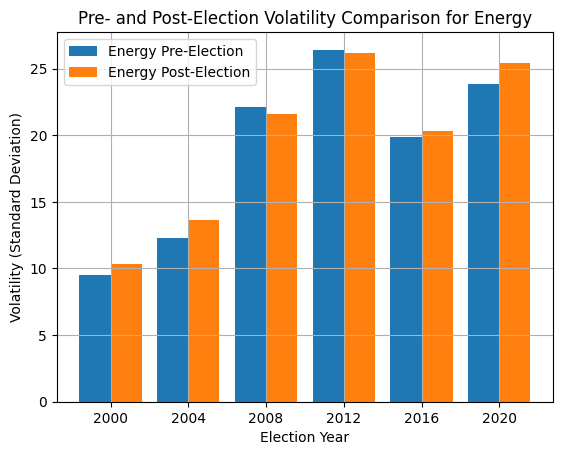

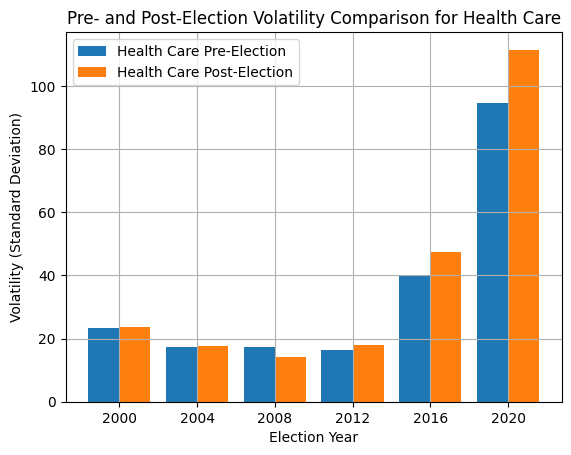

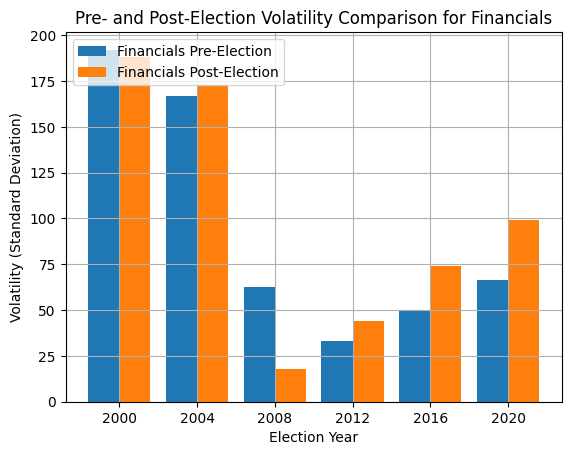

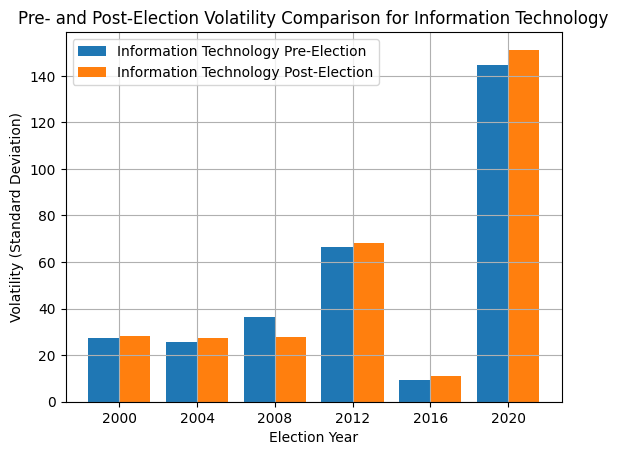

In [23]:
# List of industries sensitive to government policies
sensitive_industries = ['Energy', 'Health Care', 'Financials', 'Information Technology']

# Initialize a list to store volatility data for each year and industry
volatility_data = []

# Loop through each year to calculate pre- and post-election volatility
for year in election_data['Year']:
    pre_key = f'stock_{year}_pre'
    post_key = f'stock_{year}_post'

    if pre_key in pre_dataframe and post_key in post_dataframe:
        pre_df = pre_dataframe[pre_key]
        post_df = post_dataframe[post_key]

        for industry in sensitive_industries:
            # Calculate pre-election volatility (standard deviation of closing prices)
            pre_volatility = pre_df[pre_df['Industry'] == industry]['Close'].std()
            # Calculate post-election volatility (standard deviation of closing prices)
            post_volatility = post_df[post_df['Industry'] == industry]['Close'].std()

            # Store results in a list
            volatility_data.append({
                'Year': year,
                'Industry': industry,
                'Pre-Election Volatility': pre_volatility,
                'Post-Election Volatility': post_volatility
            })

# Convert the list to a DataFrame
volatility_df = pd.DataFrame(volatility_data)

# Iterate through each industry to plot pre- and post-election volatility
for i, industry in enumerate(sensitive_industries):
    industry_df = volatility_df[volatility_df['Industry'] == industry]
    x = np.arange(len(industry_df['Year']))  # the label locations

    plt.bar(x - 0.2, industry_df['Pre-Election Volatility'], width=0.4, label=f'{industry} Pre-Election', align='center')
    plt.bar(x + 0.2, industry_df['Post-Election Volatility'], width=0.4, label=f'{industry} Post-Election', align='center')

    # Setting x-axis labels to election years
    plt.xticks(x, industry_df['Year'])
    plt.xlabel('Election Year')
    plt.ylabel('Volatility (Standard Deviation)')
    plt.title(f'Pre- and Post-Election Volatility Comparison for {industry}')
    plt.legend(loc='upper left')
    plt.grid(True)

    plt.show()

## Hypothesis 4: The Impact of Elections on Stock Market Performance Is Stronger for Specific Industries in Certain Election Years

Explore if particular election years (e.g., 2008 during the financial crisis) had a more pronounced impact on specific industries compared to others. This can highlight how external factors combined with elections may influence specific sectors.

We calculated the absolute change in average closing prices from pre- to post-election periods for each year.
Identify "high-impact" years where changes in certain industries were larger than in other years, indicating that elections combined with external economic factors may have influenced those sectors more.

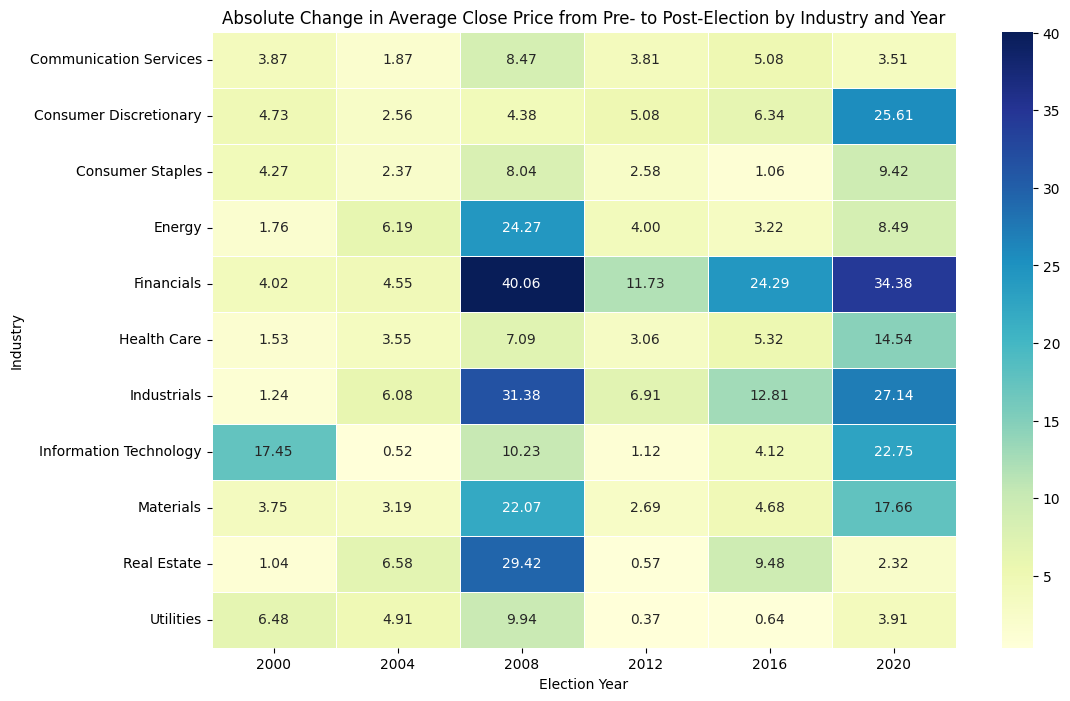

In [25]:
# Initialize a list to store absolute change data for each year and industry
absolute_change_data = []

# Loop through each year to calculate absolute change from pre- to post-election
for year in election_data['Year']:
    pre_key = f'stock_{year}_pre'
    post_key = f'stock_{year}_post'

    if pre_key in pre_dataframe and post_key in post_dataframe:
        pre_df = pre_dataframe[pre_key]
        post_df = post_dataframe[post_key]

        for industry in industries:
            # Calculate average closing price for pre- and post-election periods
            pre_avg = pre_df[pre_df['Industry'] == industry]['Close'].mean()
            post_avg = post_df[post_df['Industry'] == industry]['Close'].mean()

            # Calculate absolute change if both values are available
            if pd.notna(pre_avg) and pd.notna(post_avg):
                absolute_change = abs(post_avg - pre_avg)
                absolute_change_data.append({
                    'Year': year,
                    'Industry': industry,
                    'Absolute Change': absolute_change
                })

# Convert the list to a DataFrame
absolute_change_df = pd.DataFrame(absolute_change_data)

# Pivot the DataFrame to prepare it for a heatmap
heatmap_data = absolute_change_df.pivot(index='Industry', columns='Year', values='Absolute Change')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title('Absolute Change in Average Close Price from Pre- to Post-Election by Industry and Year')
plt.xlabel('Election Year')
plt.ylabel('Industry')
plt.show()

In [93]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

In [94]:
data = []
future_data = []

# Loop through each year except 2024 to create training data
for year in election_data['Year']:
    if year == 2024:
        continue  # Skip 2024 for now, we'll use it for prediction

    pre_key = f'stock_{year}_pre'
    post_key = f'stock_{year}_post'

    if pre_key in pre_dataframe and post_key in post_dataframe:
        pre_df = pre_dataframe[pre_key]
        post_df = post_dataframe[post_key]

        for industry in industries:
            # Calculate pre-election features
            pre_avg_close = pre_df[pre_df['Industry'] == industry]['Close'].mean()
            pre_volatility = pre_df[pre_df['Industry'] == industry]['Close'].std()

            # Calculate post-election target
            post_avg_close = post_df[post_df['Industry'] == industry]['Close'].mean()

            # Only add to dataset if we have both pre and post data
            if pd.notna(pre_avg_close) and pd.notna(post_avg_close):
                data.append({
                    'Year': year,
                    'Industry': industry,
                    'Pre_Election_Avg_Close': pre_avg_close,
                    'Pre_Election_Volatility': pre_volatility,
                    'Post_Election_Avg_Close': post_avg_close  # This is our target
                })

In [95]:
df = pd.DataFrame(data)

In [96]:
# Step 2: Prepare Features (X) and Target (y)
X = df[['Pre_Election_Avg_Close', 'Pre_Election_Volatility']]
y = df['Post_Election_Avg_Close']

In [97]:
# Define the function to optimize
def xgb_mae(n_estimators, learning_rate, max_depth, subsample, colsample_bytree, gamma, reg_alpha, reg_lambda):
    # Define model with the given parameters
    model = XGBRegressor(
        n_estimators=int(n_estimators),               # Convert float to int
        learning_rate=learning_rate,
        max_depth=int(max_depth),                     # Convert float to int
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        gamma=gamma,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        random_state=42
    )

    # Perform 3-fold cross-validation
    cv_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=3)

    # Return the mean MAE as the objective to minimize
    return np.mean(cv_scores)  # Return the mean MAE (negative because of neg_mean_absolute_error)

# Define parameter bounds for Bayesian Optimization
param_bounds = {
    'n_estimators': (50, 300),
    'learning_rate': (0.01, 0.3),
    'max_depth': (3, 10),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0),
    'gamma': (0, 0.5),
    'reg_alpha': (0, 1),
    'reg_lambda': (0.5, 2)
}

# Initialize Bayesian Optimization
optimizer = BayesianOptimization(
    f=xgb_mae,
    pbounds=param_bounds,
    random_state=42,
    verbose=2
)

# Run the optimization
optimizer.maximize(init_points=5, n_iter=15)

# Get the best parameters
best_params = optimizer.max['params']
print("Best Parameters:", best_params)

# Convert float values to integers where needed
best_params['n_estimators'] = int(best_params['n_estimators'])
best_params['max_depth'] = int(best_params['max_depth'])

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | n_esti... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------
| 1         | -21.49    | 0.7498    | 0.4754    | 0.2223    | 7.191     | 89.0      | 0.156     | 0.5871    | 0.9465    |
| 2         | -23.73    | 0.8404    | 0.354     | 0.01597   | 9.789     | 258.1     | 0.2123    | 0.7727    | 0.6734    |
| 3         | -21.23    | 0.7217    | 0.2624    | 0.1353    | 5.039     | 203.0     | 0.1395    | 0.9382    | 0.7465    |
| 4         | -21.97    | 0.7824    | 0.3926    | 0.06791   | 6.6       | 198.1     | 0.04645   | 1.411     | 0.6682    |
| 5         | -20.41    | 0.626     | 0.4744    | 0.29      | 8.659     | 126.2     | 0.09767   | 1.526     | 0.7761    |
| 6         | -20.87    | 0.6368    | 0.2995    | 0.1909    | 7.54      | 116.9     | 0.01511   | 1.948     | 0.7004    |
| 7         | -20.54    

In [98]:
best_params['n_estimators'] = int(best_params['n_estimators'])
best_params['max_depth'] = int(best_params['max_depth'])

In [99]:
# Initialize XGBRegressor with optimized parameters
model = XGBRegressor(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    gamma=best_params['gamma'],
    reg_alpha=best_params['reg_alpha'],
    reg_lambda=best_params['reg_lambda'],
    random_state=42
)

model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6260206371941118, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.4744427686266666,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2900332895916222,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=126, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [100]:
# Step 3: Prepare 2024 data for prediction
pre_key_2024 = 'stock_2024_pre'
if pre_key_2024 in pre_dataframe:
    pre_df_2024 = pre_dataframe[pre_key_2024]

    for industry in industries:
        pre_avg_close_2024 = pre_df_2024[pre_df_2024['Industry'] == industry]['Close'].mean()
        pre_volatility_2024 = pre_df_2024[pre_df_2024['Industry'] == industry]['Close'].std()

        if pd.notna(pre_avg_close_2024) and pd.notna(pre_volatility_2024):
            future_data.append({
                'Industry': industry,
                'Pre_Election_Avg_Close': pre_avg_close_2024,
                'Pre_Election_Volatility': pre_volatility_2024
            })

In [101]:
# Convert future_data to DataFrame for prediction
future_df = pd.DataFrame(future_data)

In [102]:
# Step 4: Make Predictions for 2024
X_2024 = future_df[['Pre_Election_Avg_Close', 'Pre_Election_Volatility']]
predictions_2024 = model.predict(X_2024)

In [103]:
# Add predictions to the DataFrame for easy viewing
future_df['Predicted_Post_Election_Avg_Close'] = predictions_2024

In [104]:
# Display the predictions for 2024
print("Predicted Post-Election Average Closing Prices for 2024:")
print(future_df[['Industry', 'Predicted_Post_Election_Avg_Close']])

Predicted Post-Election Average Closing Prices for 2024:
                  Industry  Predicted_Post_Election_Avg_Close
0   Communication Services                         180.052780
1   Consumer Discretionary                         210.020630
2         Consumer Staples                         241.176208
3                   Energy                          76.838829
4               Financials                         182.375641
5              Health Care                         203.660782
6              Industrials                         196.536682
7   Information Technology                         210.651077
8                Materials                         204.495728
9              Real Estate                         273.111572
10               Utilities                          77.679527
